# Data Preprocessing

In [1]:
# Neccessary imports
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append('..')

from src.visualizations import plot_kdes
from src.visualizations import plot_boxplots

In [2]:
# Load the raw data
data = pd.read_csv('../data/raw/cardio_train.csv',sep = ';')
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All columns are numeric, there are no data type mismatches and there seems to be no Nan values.

In [3]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset

In [4]:
# Quick data description
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


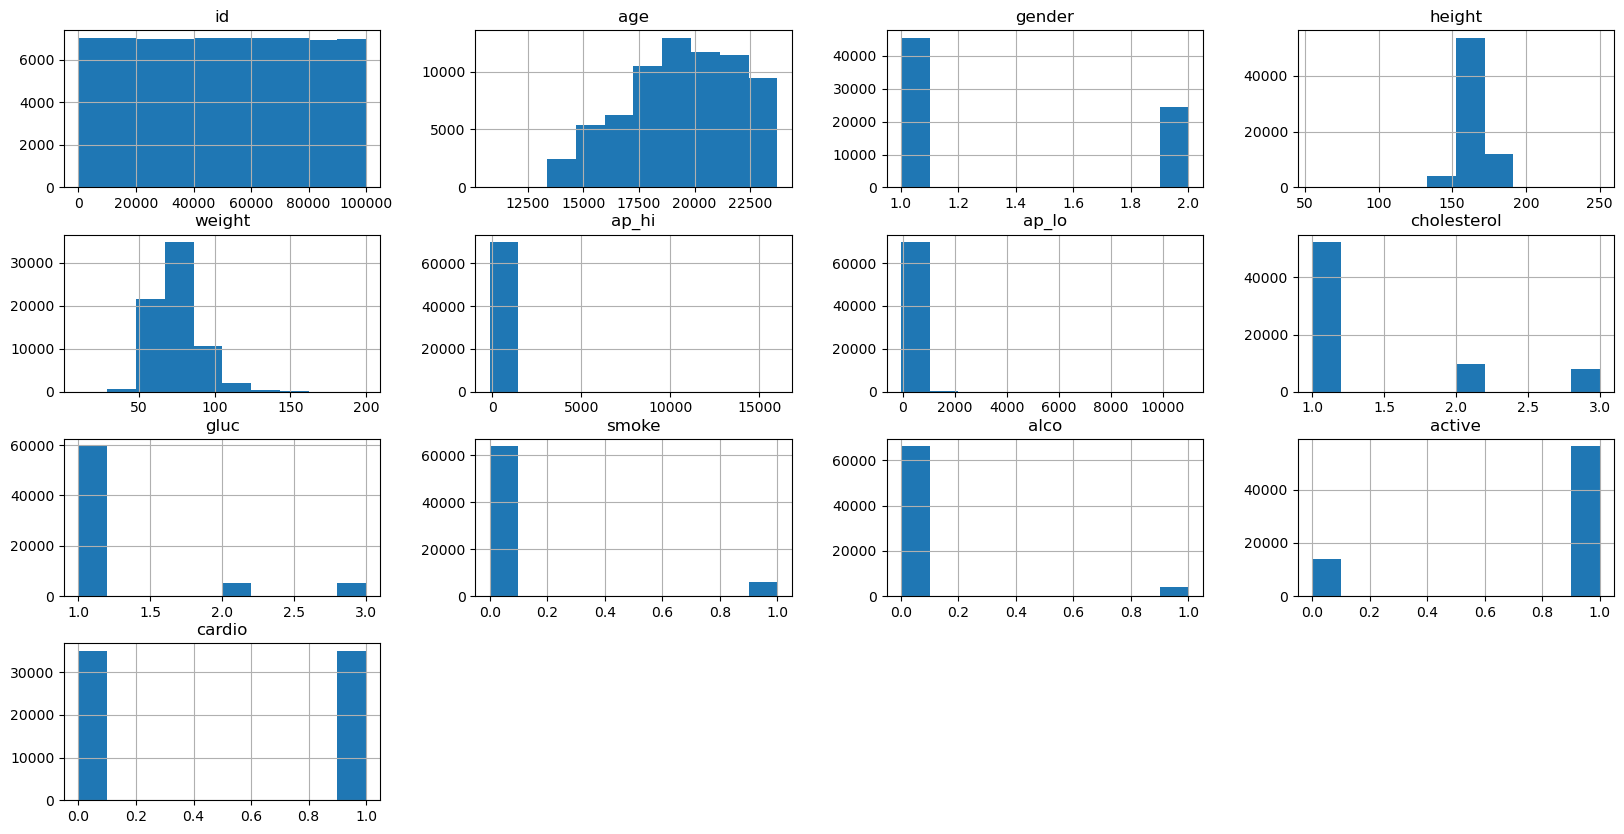

In [5]:
# Quick distribution analysis
data.hist(figsize = (20,10))
plt.show()

* id - uniform distribution, this columns would be useless for training because it carries no real information, therefore we can drop it.
* age - measured in days and that's why we have big values, distribution is somewhat gaussian and not skewed.
* gender - binary column, takes value 1 or 2. Is a little imbalanced, but it's fine.
* height - measured in cm, looks like the distribution might be skewed and have some outliers, but the value range is realistic therefore must no tbe dealt with.
* weight - measured in kg, also looks skewed and might have outliers, but the value range is realistic therefore must no tbe dealt with.
* ap_hi (systolic blood pressure) and ap_lo (diastolic blood pressure) take on ridicilous values in the central tendencie descriptions and that's why we get a huge skew. These columns require further investigation.
* cholesterol - ordinal column | 1: normal, 2: above normal, 3: well above normal |
* gluc - ordinal column |1: normal, 2: above normal, 3: well above normal|
* smoke - binary column takes either 0 (does not smoke) or 1 (smokes), imabalnced distribution.
* alco - binary column, takes either 0 (does not drink) or 1 (drinks), imbalanced distribution.
* active - binary column, takes either 0 (not physically active) or 1 (physically active), imbalanced distribution.
* cardio - tatrget variable, takes either 0 (no cardiovascular disease) or 1(has cardiovascular disease), very well balanced class.

Check the boxplots of blood pressure columns:

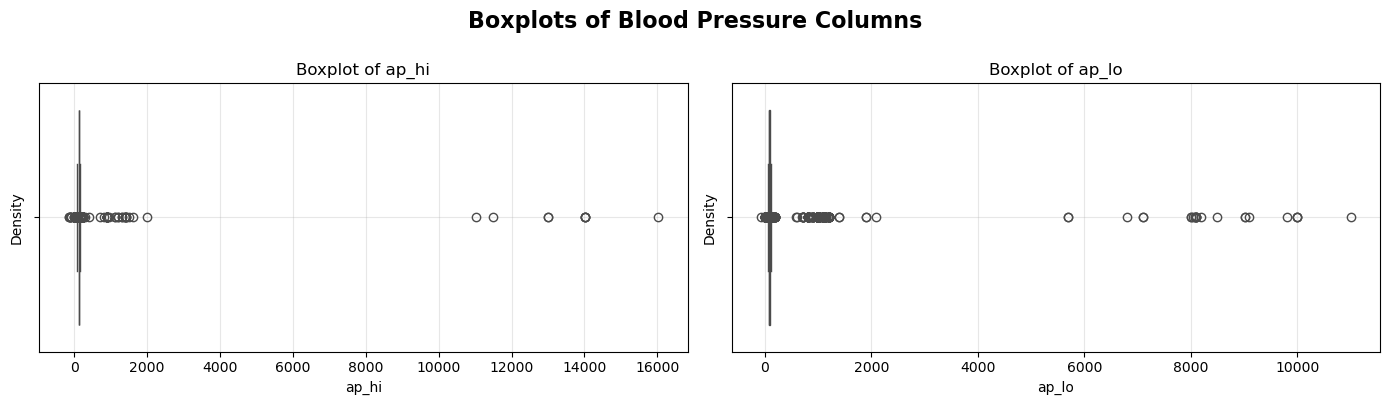

In [8]:
plot_boxplots(['ap_hi','ap_lo'],data,nrows = 1,ncols=2,figsize = (14,4),suptitle = 'Boxplots of Blood Pressure Columns')

Let's conduct an IQR analysis for ap_hi and ap_lo features since the distribution is too messed up:

In [ ]:
Q1_hi = data['ap_hi'].quantile(0.25)
Q3_hi = data['ap_hi'].quantile(0.75)
IQR_hi = Q3_hi - Q1_hi
lower_bound_hi = Q1_hi - 1.5 * IQR_hi
upper_bound_hi = Q3_hi + 1.5 * IQR_hi

print("=== (Systolic BP) IQR Analysis ===")
print(f"Q1: {Q1_hi}")
print(f"Q3: {Q3_hi}")
print(f"IQR: {IQR_hi}")
print(f"Lower bound: {lower_bound_hi}")
print(f"Upper bound: {upper_bound_hi}")
print(f"Outliers below lower bound: {(data['ap_hi'] < lower_bound_hi).sum()}")
print(f"Outliers above upper bound: {(data['ap_hi'] > upper_bound_hi).sum()}")

=== (Systolic BP) IQR Analysis ===
Q1: 120.0
Q3: 140.0
IQR: 20.0
Lower bound: 90.0
Upper bound: 170.0
Outliers below lower bound: 321
Outliers above upper bound: 1114


In [ ]:
Q1_lo = data['ap_lo'].quantile(0.25)
Q3_lo = data['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo
lower_bound_lo = Q1_lo - 1.5 * IQR_lo
upper_bound_lo = Q3_lo + 1.5 * IQR_lo

print("=== (Diastolic BP) IQR Analysis ===")
print(f"Q1: {Q1_lo}")
print(f"Q3: {Q3_lo}")
print(f"IQR: {IQR_lo}")
print(f"Lower bound: {lower_bound_lo}")
print(f"Upper bound: {upper_bound_lo}")
print(f"Outliers below lower bound: {(data['ap_lo'] < lower_bound_lo).sum()}")
print(f"Outliers above upper bound: {(data['ap_lo'] > upper_bound_lo).sum()}")

=== (Diastolic BP) IQR Analysis ===
Q1: 80.0
Q3: 90.0
IQR: 10.0
Lower bound: 65.0
Upper bound: 105.0
Outliers below lower bound: 2932
Outliers above upper bound: 1700


Now it's visible that the IQR lower and upper bounds for these feature are much closer to realiticly achieavable blood pressures, so let's drop the rows that contain these absurd outliers.

In [ ]:
# Create a the raw dataset in to what is suppossed to be processed dataset in the end
data_processed = data.copy()

data_processed = data[
    (data['ap_hi'] >= lower_bound_hi) & (data['ap_hi'] <= upper_bound_hi) &
    (data['ap_lo'] >= lower_bound_lo) & (data['ap_lo'] <= upper_bound_lo)
]

Let's now drop the id column, since it is redundant:

In [ ]:
data_processed = data_processed.drop(columns = ['id'])

data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64502 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64502 non-null  int64  
 1   gender       64502 non-null  int64  
 2   height       64502 non-null  int64  
 3   weight       64502 non-null  float64
 4   ap_hi        64502 non-null  int64  
 5   ap_lo        64502 non-null  int64  
 6   cholesterol  64502 non-null  int64  
 7   gluc         64502 non-null  int64  
 8   smoke        64502 non-null  int64  
 9   alco         64502 non-null  int64  
 10  active       64502 non-null  int64  
 11  cardio       64502 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


Around 5500 rows were removed, let's see what the ap_hi and ap_lo attribute distribution look like now:

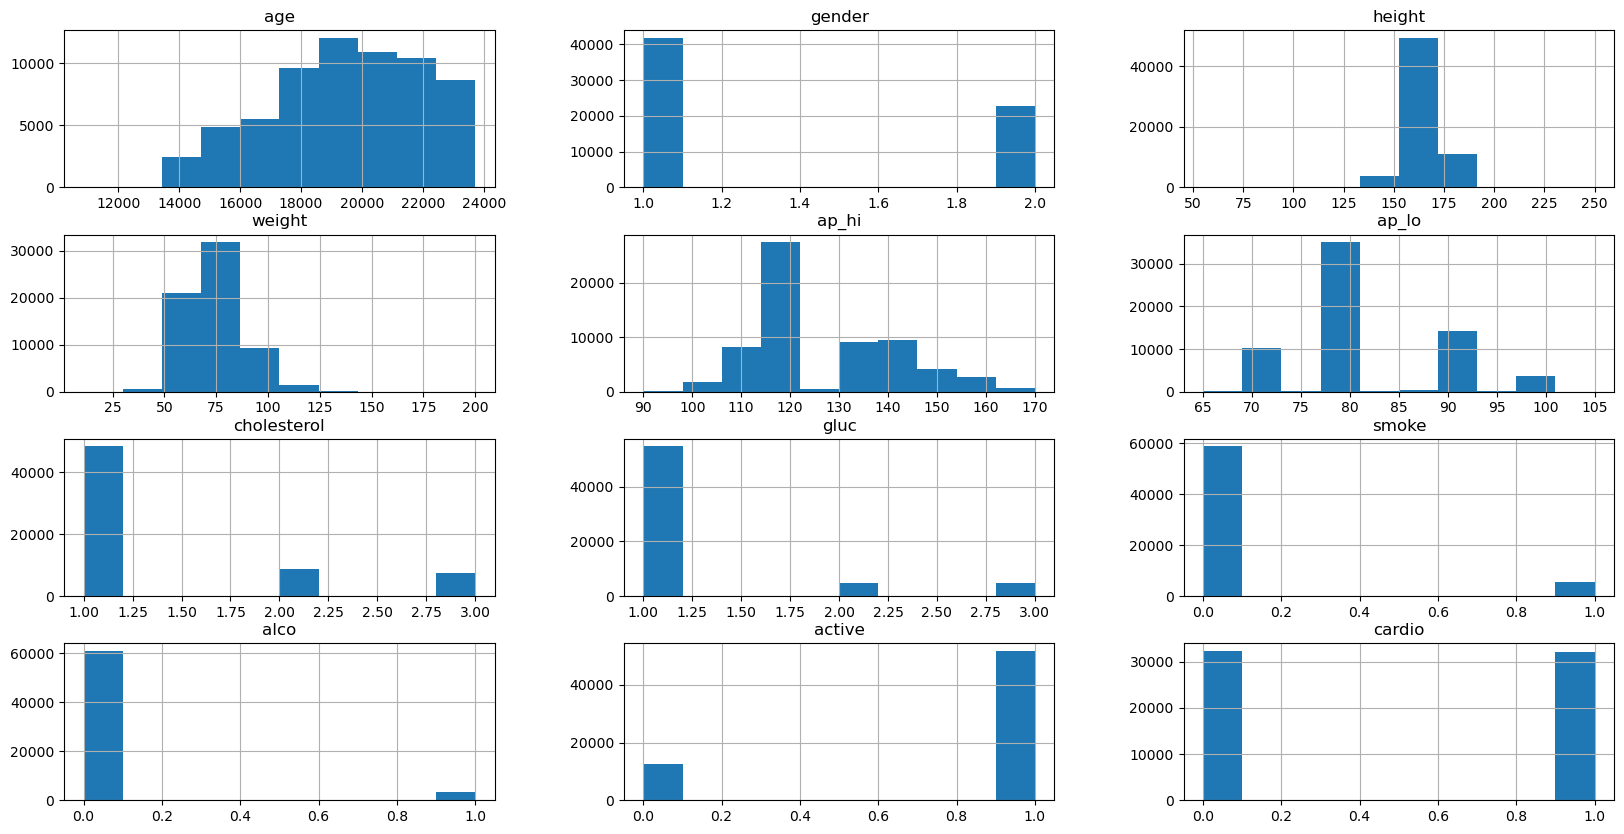

In [ ]:
# Quick distribution analysis
data_processed.hist(figsize = (20,10))
plt.show()

Distributions are okay, which concludes our data loading and cleaning process, let's save the final processed data and move on with exploratory data analysis.

In [ ]:
# Save the processed dataset
data_processed.to_csv('../data/processed/cardio_processed.csv', index=False)